In [14]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [19]:
df = pd.read_excel(os.path.join( "Resources", "combined-feat-sales_v2.xlsx"))
df.head()


,Axander-Model,id,year,model,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,BMW 7-series,272,2016,BMW 740i,Gasoline,large car,3.0,6.0,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,BMW 7-series,273,2016,BMW 740i,Gasoline,large car,3.0,6.0,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,BMW 7-series,274,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,BMW 7-series,275,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,BMW 7-series,276,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909


In [36]:

df_model = df.drop(['Axander-Model','id','displ','cyl'],axis = 1)
df_model.head()


,year,model,fuel_type,vehicle_class,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,2016,BMW 740i,Gasoline,large car,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,2016,BMW 740i,Gasoline,large car,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,2016,BMW 750i,Gasoline,large car,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,2016,BMW 750i,Gasoline,large car,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,2016,BMW 750i,Gasoline,large car,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909


In [37]:
df_model.columns

Index(['year', 'model', 'fuel_type', 'vehicle_class', 'trans', 'drive',
       'smog_rating', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'Greenhouse_gas_score',
       'smartway', 'comb_CO2', 'Sales_2016', 'Sales_2017', 'Sales_2018'],
      dtype='object')

In [42]:
# Use Pandas get_dummies to convert categorical data
comp_df = df[['year', 'model', 'fuel_type', 'vehicle_class', 'trans',
       'drive', 'smog_rating', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'Greenhouse_gas_score', 'smartway', 'comb_CO2', 'Sales_2016',
       'Sales_2017', 'Sales_2018']]
### BEGIN SOLUTION
comp_df = pd.get_dummies(comp_df)
comp_df.head()

,year,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,comb_CO2,Sales_2016,Sales_2017,Sales_2018,...,trans_Man-5,trans_Man-6,trans_SemiAuto-5,trans_SemiAuto-6,trans_SemiAuto-8,drive_2WD,drive_4WD,smartway_Elite,smartway_No,smartway_Yes
0,2016,6,21.0,29.0,24.0,5,371.0,12071,8731,7909,...,0,0,0,0,1,1,0,0,1,0
1,2016,6,21.0,29.0,24.0,5,371.0,12071,8731,7909,...,0,0,0,0,1,1,0,0,1,0
2,2016,5,17.0,25.0,20.0,4,436.0,12071,8731,7909,...,0,0,0,0,1,1,0,0,1,0
3,2016,6,17.0,25.0,20.0,4,436.0,12071,8731,7909,...,0,0,0,0,1,1,0,0,1,0
4,2016,5,16.0,25.0,19.0,4,459.0,12071,8731,7909,...,0,0,0,0,1,0,1,0,1,0


In [43]:
comp_df.columns

Index(['year', 'smog_rating', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'Greenhouse_gas_score', 'comb_CO2', 'Sales_2016', 'Sales_2017',
       'Sales_2018', 'model_BMW 740e', 'model_BMW 740i', 'model_BMW 750i',
       'model_CHEVROLET Colorado', 'model_CHEVROLET Colorado ZR2',
       'model_CHEVROLET Silverado 15', 'model_FIAT 500',
       'model_FIAT 500 Abarth', 'model_FIAT 500L', 'model_FIAT 500X',
       'model_FIAT 500e', 'model_GMC Canyon', 'model_GMC Sierra 15',
       'model_HONDA Ridgeline', 'model_JAGUAR XJ', 'model_JEEP Wrangler',
       'model_JEEP Wrangler Unlimited', 'model_NISSAN Leaf',
       'model_SMART ForTwo ed', 'model_TOYOTA 4Runner', 'model_TOYOTA Tacoma',
       'model_TOYOTA Tundra', 'fuel_type_Diesel', 'fuel_type_Electricity',
       'fuel_type_Ethanol/Gas', 'fuel_type_Gasoline',
       'fuel_type_Gasoline/Electricity', 'vehicle_class_large car',
       'vehicle_class_midsize car', 'vehicle_class_pickup',
       'vehicle_class_small SUV', 'vehicle_class_small c

In [44]:
comp_df.isna().any()


year                              False
smog_rating                       False
city_mpg                          False
hwy_mpg                           False
cmb_mpg                           False
Greenhouse_gas_score              False
comb_CO2                          False
Sales_2016                        False
Sales_2017                        False
Sales_2018                        False
model_BMW 740e                    False
model_BMW 740i                    False
model_BMW 750i                    False
model_CHEVROLET Colorado          False
model_CHEVROLET Colorado ZR2      False
model_CHEVROLET Silverado 15      False
model_FIAT 500                    False
model_FIAT 500 Abarth             False
model_FIAT 500L                   False
model_FIAT 500X                   False
model_FIAT 500e                   False
model_GMC Canyon                  False
model_GMC Sierra 15               False
model_HONDA Ridgeline             False
model_JAGUAR XJ                   False


In [47]:
# Assign X (data) and y (target)

# BEGIN SOLUTION
X = comp_df[['year', 'smog_rating', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'Greenhouse_gas_score', 'comb_CO2', 'Sales_2016', 'Sales_2017',
       'Sales_2018', 'model_BMW 740e', 'model_BMW 740i', 'model_BMW 750i',
       'model_CHEVROLET Colorado', 'model_CHEVROLET Colorado ZR2',
       'model_CHEVROLET Silverado 15', 'model_FIAT 500',
       'model_FIAT 500 Abarth', 'model_FIAT 500L', 'model_FIAT 500X',
       'model_FIAT 500e', 'model_GMC Canyon', 'model_GMC Sierra 15',
       'model_HONDA Ridgeline', 'model_JAGUAR XJ', 'model_JEEP Wrangler',
       'model_JEEP Wrangler Unlimited', 'model_NISSAN Leaf',
       'model_SMART ForTwo ed', 'model_TOYOTA 4Runner', 'model_TOYOTA Tacoma',
       'model_TOYOTA Tundra', 'fuel_type_Diesel', 'fuel_type_Electricity',
       'fuel_type_Ethanol/Gas', 'fuel_type_Gasoline',
       'fuel_type_Gasoline/Electricity', 'vehicle_class_large car',
       'vehicle_class_midsize car', 'vehicle_class_pickup',
       'vehicle_class_small SUV', 'vehicle_class_small car',
       'vehicle_class_special purpose', 'vehicle_class_standard SUV',
       'vehicle_class_station wagon', 'trans_Auto-1', 'trans_Auto-5',
       'trans_Auto-6', 'trans_Auto-8', 'trans_Auto-9', 'trans_Man-5',
       'trans_Man-6', 'trans_SemiAuto-5', 'trans_SemiAuto-6',
       'trans_SemiAuto-8', 'drive_2WD', 'drive_4WD']]
y = df['smartway'].values.reshape(-1, 1)
print(X.shape, y.shape)
# END SOLUTION

(510, 57) (510, 1)


## K Nearest Neighbors

In [48]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
### END SOLUTION


In [49]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [50]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/Users/minaljajoo/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 1, Train/Test Score: 1.000/0.977
k: 3, Train/Test Score: 0.990/0.977
k: 5, Train/Test Score: 0.990/0.977
k: 7, Train/Test Score: 0.984/0.961
k: 9, Train/Test Score: 0.971/0.969
k: 11, Train/Test Score: 0.971/0.969
k: 13, Train/Test Score: 0.971/0.969
k: 15, Train/Test Score: 0.971/0.969
k: 17, Train/Test Score: 0.979/0.977
k: 19, Train/Test Score: 0.979/0.977


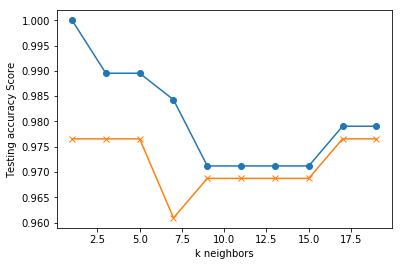

In [51]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [53]:
# Note that k: 11 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.953


/Users/minaljajoo/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
